### Bayes Classifier for MNIST digit dataset

### Part (a) - Multivariate Gaussian Distribution

**Import required libraries**

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from scipy.stats import multivariate_normal 

**Load and Preprocess data**

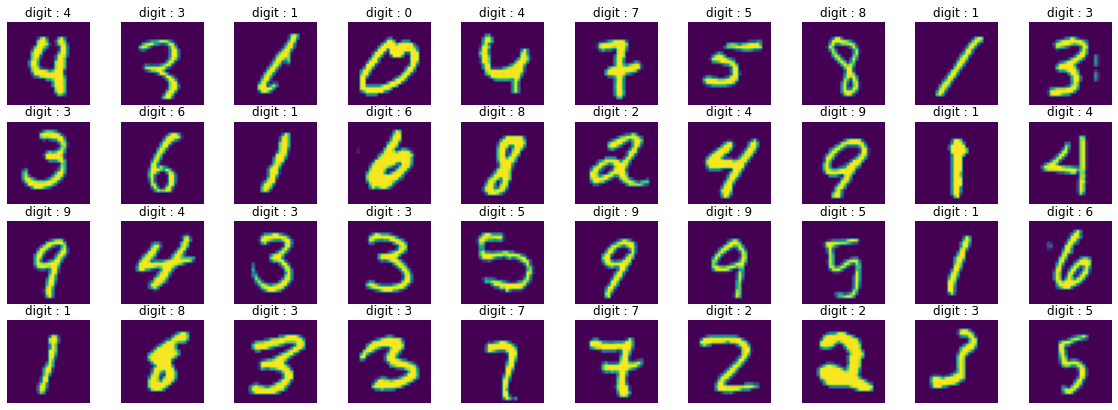

In [220]:
digit_data  = pd.DataFrame(mnist.load_data())
data, y_true  = digit_data[0][0]/255, digit_data[1][0]

# Preview Dataset
fig, axes = plt.subplots(4,10, figsize=(20,7))
indexes = np.random.choice(range(len(data)), size=40)
for i in range(4): 
    for j in range(10): 
        axes[i,j].imshow(data[indexes[i*10 + j]])
        axes[i,j].axis("off")
        axes[i,j].set_title("digit : %d"%y_true[indexes[i*10 + j]])

In [282]:
# Find MLE estimates of Mean and Covariance Matrix 

n = 784
sigma = 0.2
data = np.array(data).reshape(-1,n)

means = []
for i in range(10): 
    indexes = np.where(y_true == i)[0]
    data_tmp = data[indexes]
    mean_i = np.sum(data_tmp,axis=0)/len(indexes)
    means.append(mean_i)
    
means = np.array(means)


cov_matrix = []
for i in range(10):
    indexes = np.where(y_true == i)[0]
    data_tmp = data[indexes]
    cov_mat_i = (data_tmp- means[i]).T@(data_tmp- means[i])/len(indexes) + sigma**2*np.eye(n,n)  # to regularize cov_matrix  which may be singular
    cov_matrix.append(cov_mat_i)


In [283]:
def multi_gauss_pdf(X,mu, sigma): 
    y = multivariate_normal.pdf(X,mu,sigma)
    return y 

In [284]:
predictions = []
for i in range(10):
    y = multi_gauss_pdf(data,means[i],cov_matrix[i])
    predictions.append(y)

predictions = np.array(predictions)
pred_y = np.argmax(predictions,axis=0)
pred_y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [285]:
acc = [ 1 if pred_y[i]==y_true[i] else 0 for i in range(len(data))]
acc = sum(acc)/len(acc)*100
print("Accuracy : ",acc,"%")

Accuracy :  95.95833333333333 %


### Part (b) - Multivariate Exponential Distribution

**Load and Preprocess data** (Again)

In [293]:
digit_data  = pd.DataFrame(mnist.load_data())
data = digit_data[0][0] + 1
data = np.array(data).reshape(-1,784)
y_true = digit_data[1][0]

lambdas = []
for i in range(10): 
    indexes = np.where(y_true == i)[0]
    data_tmp = data[indexes]
    lambda_i = len(data_tmp)/np.sum(data_tmp,axis=0)
    lambdas.append(lambda_i)
lambdas = np.array(lambdas)
lambdas.shape


(10, 784)

In [312]:
def multi_exponential_pdf(X,Lambda):
    y = np.sum(np.log(Lambda)) - np.sum(Lambda*X, axis=1)
    return y

In [313]:
predictions = []
for i in range(10):
    y = multi_exponential_pdf(data,lambdas[i])
    predictions.append(y)

predictions = np.array(predictions)
pred_y = np.argmax(predictions,axis=0)
pred_y

array([3, 0, 4, ..., 5, 6, 8], dtype=int64)

In [315]:
acc = [ 1 if pred_y[i]==y_true[i] else 0 for i in range(len(data))]
acc = sum(acc)/len(acc)*100
print("Accuracy : ",acc,"%")

Accuracy :  77.67666666666668 %


---